## Notebook for processing and combining 4 datasets in order to make a balanced dataset for training models.

In [1]:
import os, random, pickle, json
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

from config import Config
from process_images import ImageUtils

%matplotlib inline
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
# init config holding constants
config = Config()
config.im_size = 128

#init image utils
im_utils = ImageUtils(config)

## Load WWMR

In [3]:
from process_images import WWMRImageProcessor

In [31]:
wwmr_image_proc = WWMRImageProcessor(config)

In [6]:
# process and store tensors for WWMR
wwmr_image_proc.process_images()

Loading image data...

 100 {'path': '../data/real/WWMR-DB - Part 1\\Subject 12\\Mask Or Respirator Correctly Worn\\Non-Medical Mask/0012_MRCW_NMDM_0045.jpg', 'size': (4224, 3136, 3), 'mask_status': 'MRCW'}

 200 {'path': '../data/real/WWMR-DB - Part 1\\Subject 16\\Mask Or Respirator Not Worn/0016_MRNW_0090.jpg', 'size': (3264, 2448, 3), 'mask_status': 'MRNW'}

 300 {'path': '../data/real/WWMR-DB - Part 1\\Subject 4\\Mask Or Respirator On The Forehead\\Non-Medical Mask/0004_MRFH_NMDM_0000.jpg', 'size': (5184, 3880, 3), 'mask_status': 'MRFH'}

 400 {'path': '../data/real/WWMR-DB - Part 1\\Subject 7\\Mask Or Respirator Not Worn/0007_MRNW_0000.jpg', 'size': (1280, 960, 3), 'mask_status': 'MRNW'}
446 files processed

 100 {'path': '../data/real/WWMR-DB - Part 2\\Subject 20\\Mask Or Respirator On The Tip Of The Nose\\Surgical Mask/0020_MRTN_SRGM_0045.jpg', 'size': (3264, 2448, 3), 'mask_status': 'MRTN'}

 200 {'path': '../data/real/WWMR-DB - Part 2\\Subject 27\\Mask Or Respirator Correctly 

100
200
300
400
500
600
700
800
900
torch.Size([981, 3, 128, 128])
saving ../data/real/x_128.pt
Done!


In [32]:
#load the processed data

wwmr_x, wwmr_y, wwmr_im_names = wwmr_image_proc.load_data()

wwmr_x.shape

torch.Size([981, 3, 128, 128])

In [33]:
#Get class counts: 0=no mask, 1=mask correct, 2=mask incorrect
print(np.unique(wwmr_y, return_counts=True))

(array([0, 1, 2], dtype=int64), array([113, 152, 716], dtype=int64))


In [34]:
# augment class 2 since there are additional instances of class 0 and 1 in the other datasets

wwmr_x, wwmr_y, wwmr_im_names = im_utils.flip_augment_class(wwmr_x, wwmr_y, wwmr_im_names, class_idx_to_flip=2, num=280)

print(np.unique(wwmr_y, return_counts=True))

Flipping 280 instances of class index 2
New dataset size: 1261
Shuffling...
(array([0., 1., 2.], dtype=float32), array([113, 152, 996], dtype=int64))


In [35]:
#save the augmented data

torch.save(wwmr_x, '%s/x_%d.pt' % (config.wwmr_path, config.im_size))
torch.save(wwmr_y, '%s/y.pt' % (config.wwmr_path))
with open('%s/im_names.txt' % config.wwmr_path, 'w') as o:
    o.write('\n'.join(wwmr_im_names))

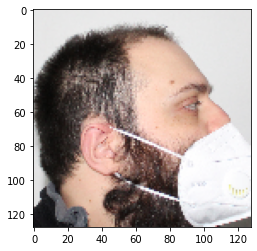

In [36]:
#show random image

im_index = random.randint(0, len(wwmr_im_names)-1)
im_utils.show_image(wwmr_x[im_index])

## Load FMD data

In [8]:
from process_images import FMDImageProcessor

In [37]:
fmd_image_proc = FMDImageProcessor(config)

In [10]:
# process and store tensors for FMD

fmd_image_proc.process_images()

50 25
100 50
150 81
200 110
250 135
300 167
350 194
400 218
450 244
500 272
550 301
600 329
650 359
700 392
750 408
800 432
850 459
torch.Size([462, 3, 128, 128])
saving ../data/face_mask_detection/x_128.pt


In [38]:
#load the processed data

fmd_x, fmd_y, fmd_im_names = fmd_image_proc.load_data()
fmd_x.shape

torch.Size([462, 3, 128, 128])

In [39]:
#class counts are now 113+64=177, 152+379=531, 996+19=1015
print(np.unique(fmd_y, return_counts=True))

(array([0, 1, 2], dtype=int64), array([ 64, 379,  19], dtype=int64))


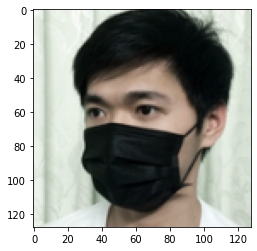

In [12]:
#show random image

im_index = random.randint(0, len(fmd_im_names)-1)
image_proc.show_image(fmd_x[im_index])

## Load MFN data

In [13]:
from process_images import MFNImageProcessor

In [40]:
mfn_image_proc = MFNImageProcessor(config)

In [15]:
# these are only 450 instances of masks worn correctly
mfn_image_proc.process_images(num_ims=450)

saving ../data/masked_face_net/x_128.pt


In [41]:
#load the processed data

mfn_x, mfn_y, mfn_im_names = mfn_image_proc.load_data()
mfn_x.shape

torch.Size([450, 3, 128, 128])

In [42]:
#class counts are now 177, 531+450=981, 1015
print(np.unique(mfn_y, return_counts=True))

(array([1], dtype=int64), array([450], dtype=int64))


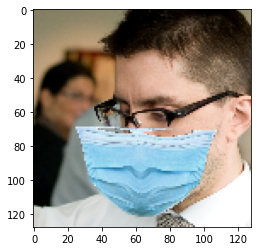

In [18]:
#show random image

im_index = random.randint(0, len(mfn_im_names)-1)
image_proc.show_image(mfn_x[im_index])

## Load GAN faces data

In [21]:
from process_images import GANImageProcessor

In [43]:
gan_image_proc = GANImageProcessor(config)

In [23]:
# process and store tensors for GAN

gan_image_proc.process_images(num_ims=800)

saving ../data/gan_faces/x_128.pt


In [44]:
#load the processed data

gan_x, gan_y, gan_im_names = gan_image_proc.load_data()
gan_x.shape

torch.Size([800, 3, 128, 128])

In [45]:
#class counts are now roughly 1000 each: 177+800=977, 531+450=981, 1015

print(np.unique(gan_y, return_counts=True))

(array([0], dtype=int64), array([800], dtype=int64))


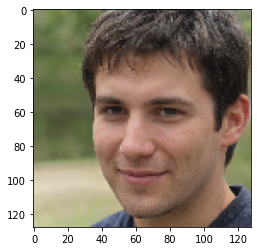

In [46]:
#show random image

im_index = random.randint(0, len(gan_im_names)-1)
image_proc.show_image(gan_x[im_index])

## Combine and shuffle

In [47]:
# combine the 4 datasets and shuffle together

x = torch.cat((wwmr_x, fmd_x, mfn_x, gan_x))

y = torch.cat((wwmr_y, fmd_y, mfn_y, gan_y))

im_names = wwmr_im_names.copy()
im_names.extend(fmd_im_names)
im_names.extend(mfn_im_names)
im_names.extend(gan_im_names)

print(x.shape, y.shape, len(im_names))

np.unique(y, return_counts=True)

torch.Size([2973, 3, 128, 128]) torch.Size([2973]) 2973


(array([0., 1., 2.], dtype=float32), array([ 977,  981, 1015], dtype=int64))

In [48]:
#shuffle

idx = np.arange(y.size(0))
np.random.shuffle(idx)

x = x[idx]
y = y[idx]
im_names = [im_names[i] for i in idx.tolist()]

In [49]:
#store combined data

torch.save(x, '%s/x_%d.pt' % (config.combined_data_path, config.im_size))
torch.save(y, '%s/y.pt' % (config.combined_data_path))
with open('%s/im_names.txt' % (config.combined_data_path), 'w') as o:
    o.write('\n'.join(im_names))